<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT306 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



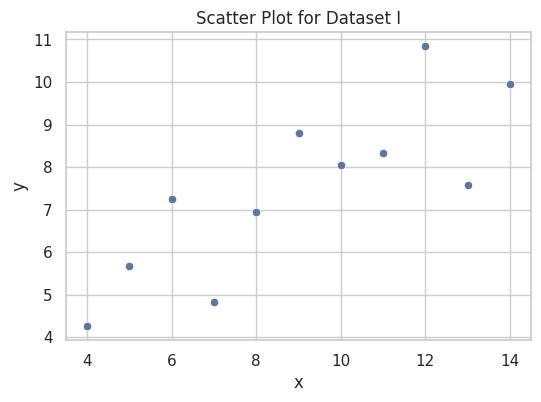

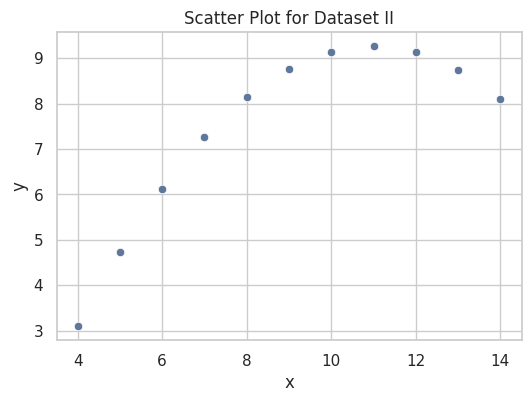

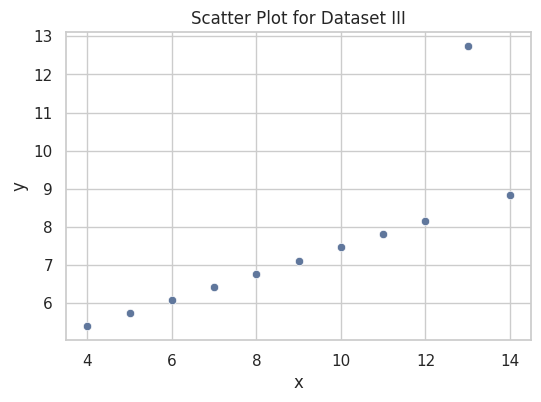

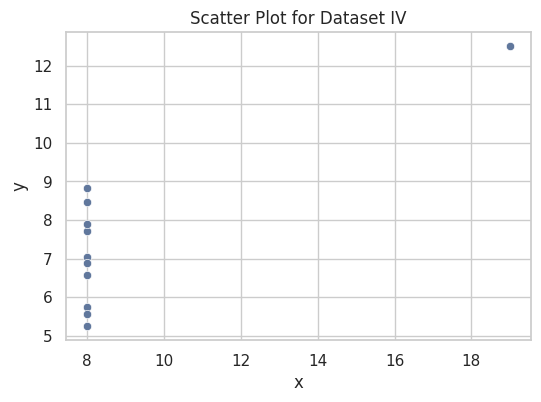

In [4]:
# Load the Anscombe dataset again to ensure the 'data' variable is available
data = sns.load_dataset("anscombe")

# Get the unique dataset names
datasets = data['dataset'].unique()

# Create a scatter plot for each dataset
for dataset_name in datasets:
    # Filter data for the current dataset
    dataset_data = data[data['dataset'] == dataset_name]

    # Create scatter plot
    plt.figure(figsize=(6, 4))  # Optional: adjust figure size
    sns.scatterplot(x='x', y='y', data=dataset_data)
    plt.title(f'Scatter Plot for Dataset {dataset_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Basándonos en los gráficos de dispersión generados para cada conjunto de datos:

*   **Conjunto de datos I:** Muestra una relación lineal clara entre x e y, con puntos muy agrupados alrededor de una línea recta.
*   **Conjunto de datos II:** Muestra una relación no lineal, parecida a una parábola. Un modelo lineal no se ajustaría bien a estos datos.
*   **Conjunto de datos III:** Muestra una fuerte relación lineal, con la excepción de un punto atípico (outlier) que está lejos de la tendencia general. Este punto atípico afectará significativamente a un modelo de regresión lineal.
*   **Conjunto de datos IV:** Muestra que la mayoría de los valores de y son los mismos para diferentes valores de x, excepto por un punto atípico con valores de x e y mucho mayores. Este conjunto de datos no es adecuado para la regresión lineal.

Estas visualizaciones muestran claramente que, a pesar de tener estadísticas de resumen similares, las relaciones subyacentes entre x e y son muy diferentes en cada conjunto de datos.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [5]:
# Group data by dataset and display descriptive statistics for each group
data.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Todos los conjuntos tienen la misma cantidad de datos, con la misma media y desviación estándar. Sin embargo, los mínimos y máximos son todos distintos, así como la manera en que están distribuidos en los cuartiles. Esto es porque parecen venir de distribuciones distintas.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



Dataset: I
Mean Squared Error (MSE): 1.25
R-squared (R²): 0.67
------------------------------


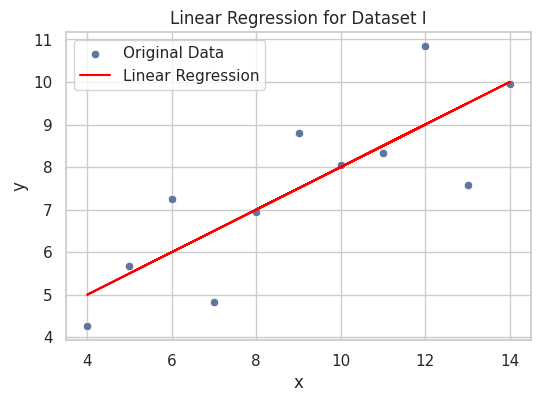

Dataset: II
Mean Squared Error (MSE): 1.25
R-squared (R²): 0.67
------------------------------


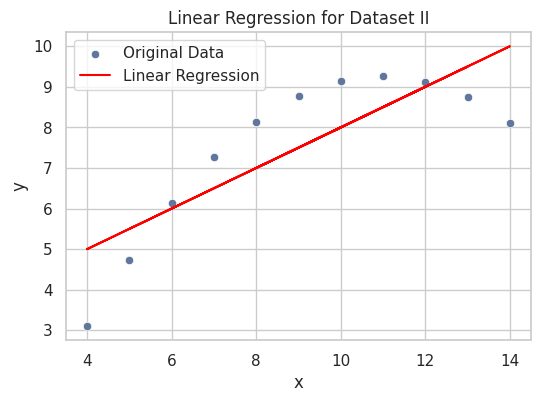

Dataset: III
Mean Squared Error (MSE): 1.25
R-squared (R²): 0.67
------------------------------


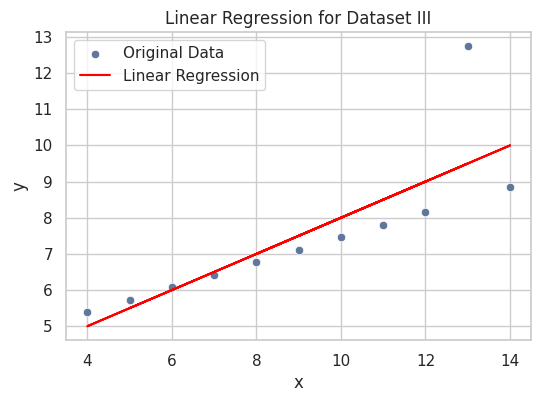

Dataset: IV
Mean Squared Error (MSE): 1.25
R-squared (R²): 0.67
------------------------------


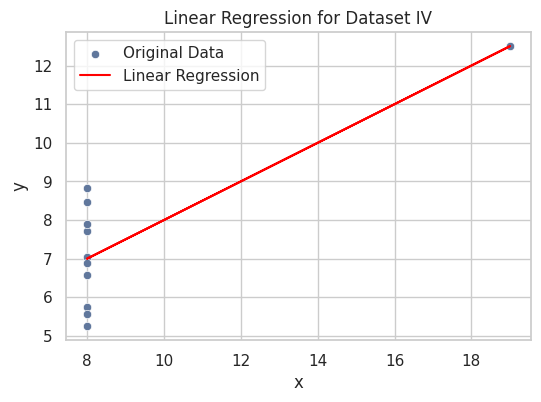

In [6]:
# Fit linear regression model for each dataset
datasets = data['dataset'].unique()

for dataset_name in datasets:
    # Filter data for the current dataset
    dataset_data = data[data['dataset'] == dataset_name]

    # Prepare data for linear regression
    X = dataset_data[['x']]  # Features (independent variable)
    y = dataset_data['y']   # Target (dependent variable)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Print the evaluation metrics
    print(f"Dataset: {dataset_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print("-" * 30)

    # Plot the results
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='x', y='y', data=dataset_data, label='Original Data')
    plt.plot(X, y_pred, color='red', label='Linear Regression')
    plt.title(f'Linear Regression for Dataset {dataset_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Los cuatro conjuntos de datos presentan el mismo MSE (1.25) y R² (0.67), pero el ajuste real difiere. En el Conjunto I, la relación es lineal y el modelo se ajusta bien. En el Conjunto II, la relación es parabólica y la recta no representa los datos. En el Conjunto III, un valor atípico desvía la línea del patrón general. En el Conjunto IV, un punto extremo aplana la recta y oculta la tendencia. Aunque las métricas son iguales, solo el primer conjunto se ajusta correctamente, lo que demuestra que las estadísticas sin visualización pueden ser engañosas.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

Estrategias para mejorar el ajuste del modelo en conjuntos de datos donde la regresión lineal fue inadecuada:
------------------------------------------------------------------------------------------

Conjunto de datos II: Relación no lineal
Regresión Polinómica (Grado 2) para el Conjunto de datos II:
Error Cuadrático Medio (MSE): 0.00
R-cuadrado (R²): 1.00


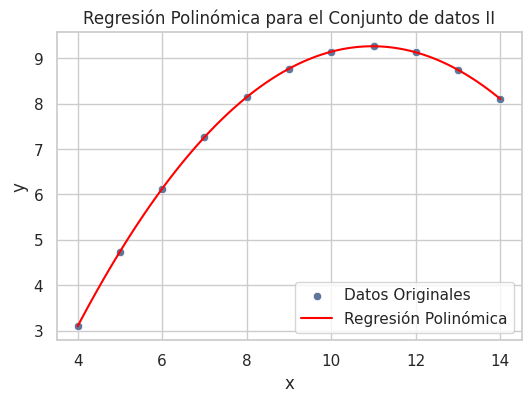


Conjunto de datos III: Relación lineal con un valor atípico
Regresión Lineal (Valor Atípico Eliminado) para el Conjunto de datos III:
Error Cuadrático Medio (MSE): 0.00
R-cuadrado (R²): 1.00


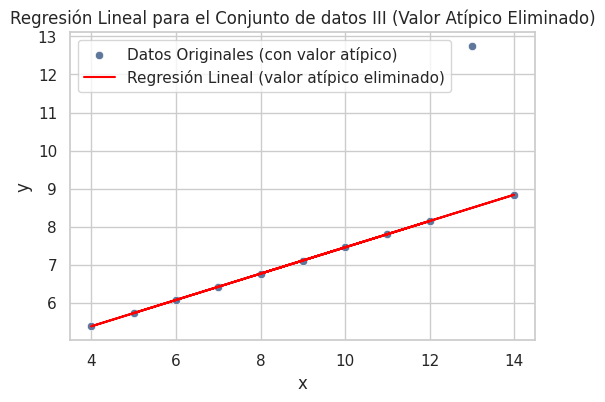

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the Anscombe dataset if not already loaded
if 'data' not in locals():
    data = sns.load_dataset("anscombe")

print("Estrategias para mejorar el ajuste del modelo en conjuntos de datos donde la regresión lineal fue inadecuada:")
print("-" * 90)

# Dataset II: Relación no lineal (parabólica)
print("\nConjunto de datos II: Relación no lineal")
dataset_II_data = data[data['dataset'] == 'II'].copy()
X_II = dataset_II_data[['x']]
y_II = dataset_II_data['y']

# Ajustar un modelo de regresión polinómica (grado 2)
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X_II, y_II)
y_pred_poly = model_poly.predict(X_II)

mse_poly = mean_squared_error(y_II, y_pred_poly)
r2_poly = r2_score(y_II, y_pred_poly)

print(f"Regresión Polinómica (Grado 2) para el Conjunto de datos II:")
print(f"Error Cuadrático Medio (MSE): {mse_poly:.2f}")
print(f"R-cuadrado (R²): {r2_poly:.2f}")

# Graficar los resultados de la regresión polinómica
plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=dataset_II_data, label='Datos Originales')
# Para graficar la curva polinómica, generamos puntos x suaves para la predicción
x_smooth = pd.DataFrame({'x': np.linspace(X_II['x'].min(), X_II['x'].max(), 100)})
y_pred_smooth = model_poly.predict(x_smooth)
plt.plot(x_smooth['x'], y_pred_smooth, color='red', label='Regresión Polinómica')
plt.title('Regresión Polinómica para el Conjunto de datos II')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Dataset III: Relación lineal con un valor atípico
print("\nConjunto de datos III: Relación lineal con un valor atípico")
dataset_III_data = data[data['dataset'] == 'III'].copy()

# Identificar y eliminar el valor atípico (visualmente del gráfico de dispersión, el valor atípico está en x=13, y=12.74)
outlier_x = 13.0
outlier_y = 12.74
dataset_III_filtered = dataset_III_data[(dataset_III_data['x'] != outlier_x) | (dataset_III_data['y'] != outlier_y)].copy()

X_III_filtered = dataset_III_filtered[['x']]
y_III_filtered = dataset_III_filtered['y']

# Ajustar el modelo de regresión lineal en los datos filtrados
model_linear_filtered = LinearRegression()
model_linear_filtered.fit(X_III_filtered, y_III_filtered)
y_pred_linear_filtered = model_linear_filtered.predict(X_III_filtered)

mse_linear_filtered = mean_squared_error(y_III_filtered, y_pred_linear_filtered)
r2_linear_filtered = r2_score(y_III_filtered, y_pred_linear_filtered)

print(f"Regresión Lineal (Valor Atípico Eliminado) para el Conjunto de datos III:")
print(f"Error Cuadrático Medio (MSE): {mse_linear_filtered:.2f}")
print(f"R-cuadrado (R²): {r2_linear_filtered:.2f}")

# Graficar los resultados de la regresión lineal en los datos filtrados
plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=dataset_III_data, label='Datos Originales (con valor atípico)')
plt.plot(X_III_filtered, y_pred_linear_filtered, color='red', label='Regresión Lineal (valor atípico eliminado)')
plt.title('Regresión Lineal para el Conjunto de datos III (Valor Atípico Eliminado)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Dataset IV: No adecuado para regresión lineal (la explicación se dará en una celda de texto aparte)

Conjunto de datos IV: No adecuado para regresión lineal.

El Conjunto de datos IV presenta una estructura única donde la mayoría de los valores de 'x' son idénticos, a excepción de un único valor atípico.
Si el objetivo es predecir 'y', podríamos simplemente usar la media de 'y'.